# Análise de Dados de Filmes

Este notebook contém várias análises sobre dados de filmes, explorando diferentes aspectos como orçamento, receita, equipe, gêneros e muito mais.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Carregando o dataset
script_dir = os.path.dirname(os.path.abspath('__file__'))
DATASET_PATH = os.path.join(script_dir, 'movies.csv')

try:
    df = pd.read_csv(DATASET_PATH)
    print("Dataset carregado com sucesso!")
    print(f"Número de filmes: {len(df)}")
    print("\nPrimeiras linhas do dataset:")
    display(df.head())
except FileNotFoundError:
    print("Erro: Arquivo movies.csv não encontrado")

Dataset carregado com sucesso!
Número de filmes: 4803

Primeiras linhas do dataset:


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


## 1. Análise de Orçamento e Receita

Vamos analisar a relação entre o orçamento dos filmes e sua receita, calculando também o ROI (Return on Investment).

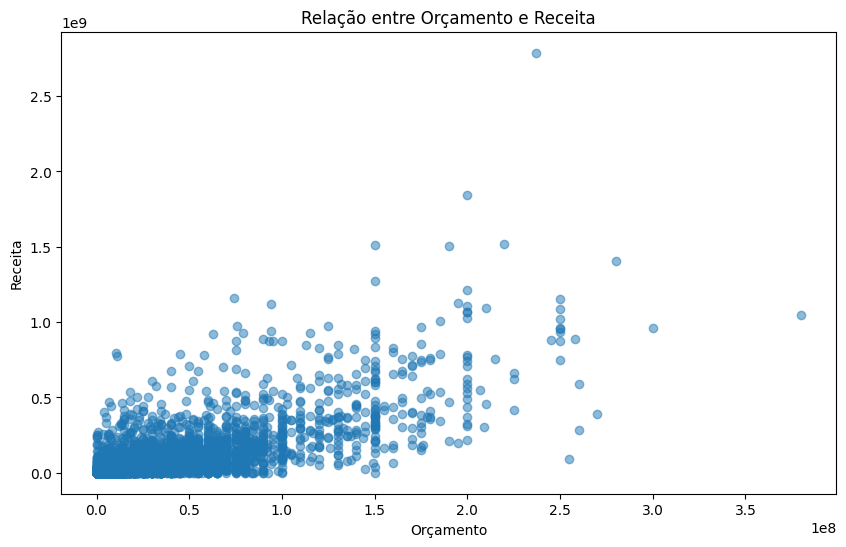

Correlação entre orçamento e receita: 0.73

Estatísticas do ROI:
count    3913.000000
mean             inf
std              NaN
min        -1.000000
25%        -0.454545
50%         0.999014
75%         3.326712
max              inf
Name: ROI, dtype: float64


c:\Users\julio\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [2]:
def analise_orcamento_receita(df):
    # Calculando o ROI
    df['ROI'] = (df['revenue'] - df['budget']) / df['budget']

    # Criando o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    plt.scatter(df['budget'], df['revenue'], alpha=0.5)
    plt.xlabel('Orçamento')
    plt.ylabel('Receita')
    plt.title('Relação entre Orçamento e Receita')
    plt.show()

    # Calculando a correlação
    correlacao = df['budget'].corr(df['revenue'])
    print(f"Correlação entre orçamento e receita: {correlacao:.2f}")
    
    # Exibindo estatísticas do ROI
    print(f"\nEstatísticas do ROI:")
    print(df['ROI'].describe())

analise_orcamento_receita(df)

## 2. Análise de Produtoras

Vamos investigar como o número de produtoras envolvidas se correlaciona com o orçamento e a bilheteria dos filmes.

Análise de produtoras em desenvolvimento...


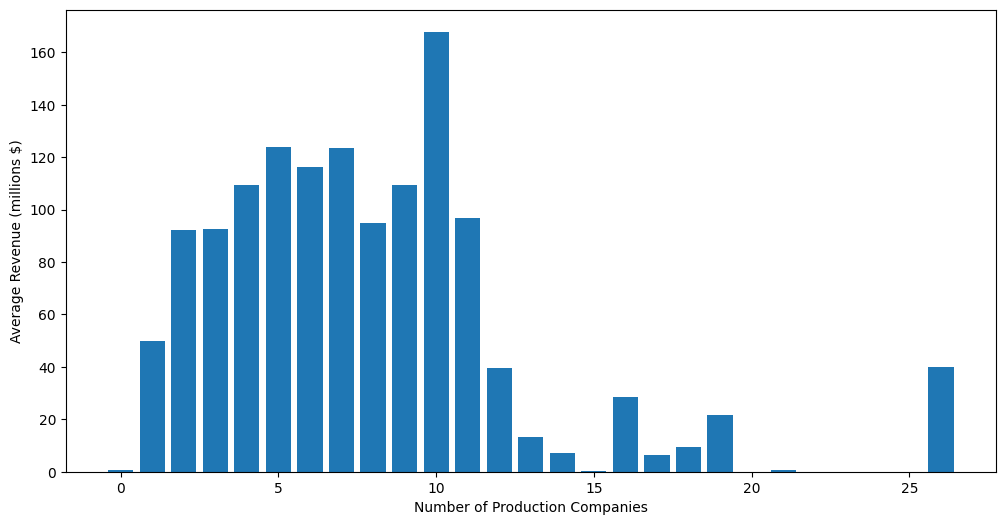

In [3]:
def analise_produtoras(df):
    print("Análise de produtoras em desenvolvimento...")# Create a column with the count of production companies
    df['production_company_count'] = df['production_companies'].apply(lambda x: len(eval(x)))

    # Group by company count and analyze
    company_analysis = df.groupby('production_company_count').agg({
        'budget': 'mean',
        'revenue': 'mean',
        'vote_average': 'mean'
    }).reset_index()

    # Visualize the results
    plt.figure(figsize=(12, 6))
    plt.bar(company_analysis['production_company_count'], company_analysis['revenue'] / 1000000)
    plt.xlabel('Number of Production Companies')
    plt.ylabel('Average Revenue (millions $)')
    # Implementação futura

analise_produtoras(df)

## 3. Análise de Diretores e Atores

Vamos identificar quais diretores trabalham frequentemente com os mesmos atores em múltiplos filmes.

In [14]:
def analise_diretores_atores(df):
    print("Análise de diretores e atores em desenvolvimento...")

analise_diretores_atores(df)

Análise de diretores e atores em desenvolvimento...


## 4. Análise de Duração e Popularidade

Vamos investigar se existe alguma relação entre a duração do filme e sua popularidade ou avaliação.

Análise de duração e popularidade em desenvolvimento...
Runtime-Popularity correlation: 0.23
Runtime-Vote Average correlation: 0.38


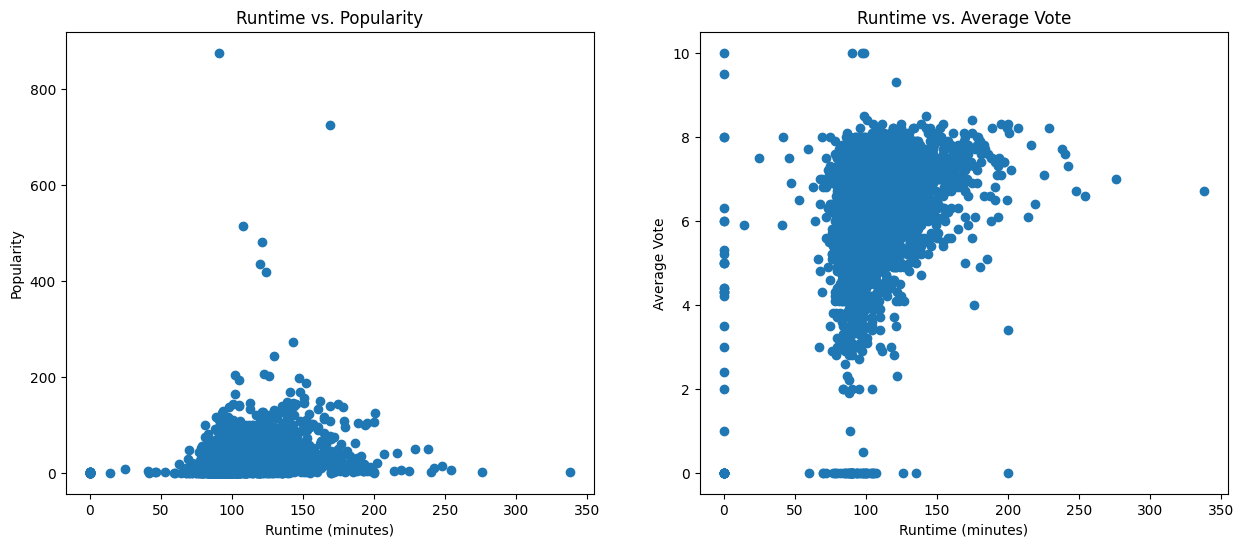

In [4]:
def analise_duracao_popularidade(df):
    print("Análise de duração e popularidade em desenvolvimento...")
    # Create scatter plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    ax1.scatter(df['runtime'], df['popularity'])
    ax1.set_title('Runtime vs. Popularity')
    ax1.set_xlabel('Runtime (minutes)')
    ax1.set_ylabel('Popularity')

    ax2.scatter(df['runtime'], df['vote_average'])
    ax2.set_title('Runtime vs. Average Vote')
    ax2.set_xlabel('Runtime (minutes)')
    ax2.set_ylabel('Average Vote')

    # Calculate correlations
    runtime_popularity_corr = df['runtime'].corr(df['popularity'])
    runtime_vote_corr = df['runtime'].corr(df['vote_average'])
    print(f"Runtime-Popularity correlation: {runtime_popularity_corr:.2f}")
    print(f"Runtime-Vote Average correlation: {runtime_vote_corr:.2f}") 

analise_duracao_popularidade(df)

## 5. Análise de Diversidade de Gênero

Vamos analisar a diversidade de gênero nas equipes de produção dos filmes.

Análise de diversidade de gênero em desenvolvimento...


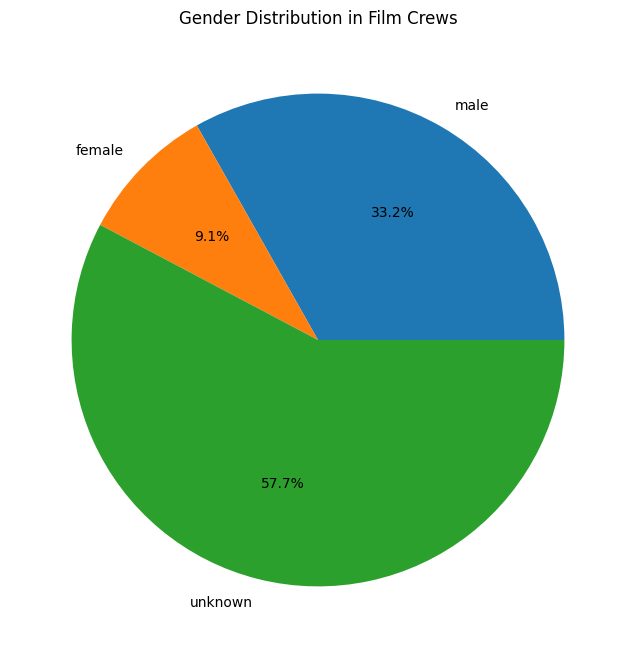

In [5]:
def analise_diversidade_genero(df):
    print("Análise de diversidade de gênero em desenvolvimento...")
    def extract_gender_data(crew_str):
        crew = eval(crew_str)
        gender_counts = {'male': 0, 'female': 0, 'unknown': 0}
        
        for person in crew:
            if person['gender'] == 1:
                gender_counts['female'] += 1
            elif person['gender'] == 2:
                gender_counts['male'] += 1
            else:
                gender_counts['unknown'] += 1
        
        return pd.Series(gender_counts)

    gender_df = df['crew'].apply(extract_gender_data)
    gender_totals = gender_df.sum()

    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(gender_totals, labels=gender_totals.index, autopct='%1.1f%%')
    plt.title('Gender Distribution in Film Crews')

analise_diversidade_genero(df)

## 6. Análise de Gêneros e Orçamento

Vamos investigar quais gêneros têm maiores orçamentos e se isso resulta em maior receita.

Análise de gêneros e orçamento em desenvolvimento...


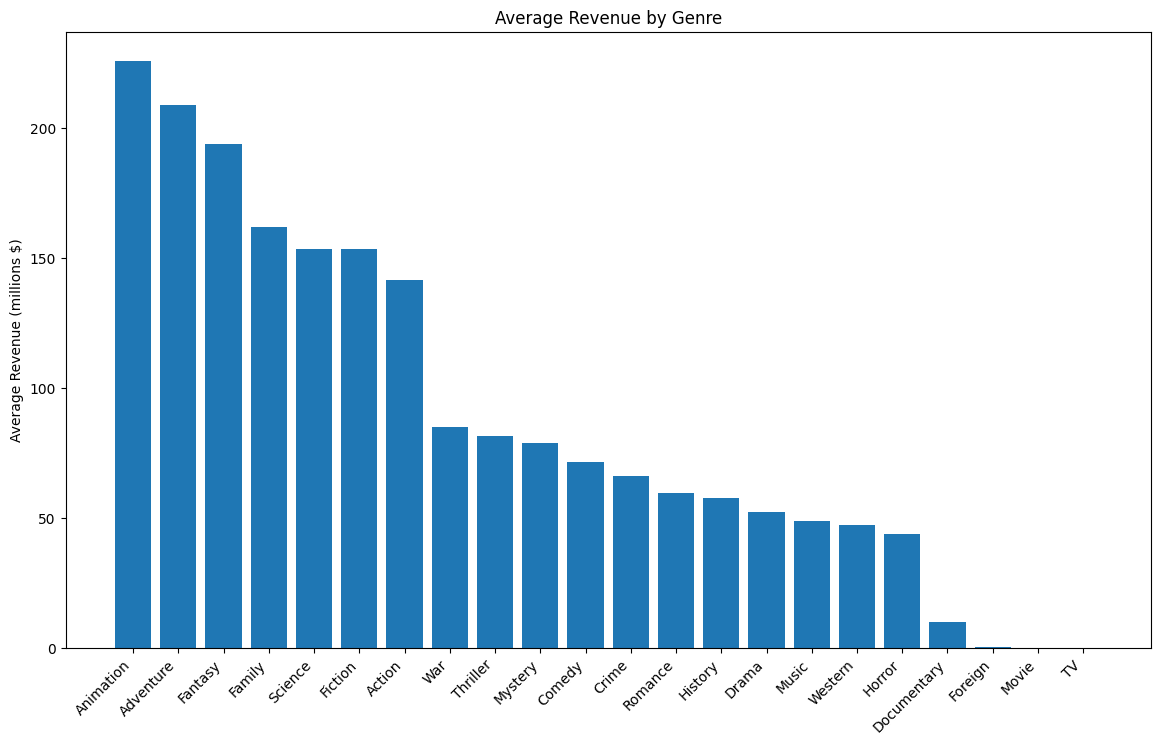

In [6]:
def analise_generos_orcamento(df):
    print("Análise de gêneros e orçamento em desenvolvimento...")
    # Implementação futura
    # Extract genres and create genre combinations
    df['genre_list'] = df['genres'].str.split()

    # Explode the dataframe so each genre gets its own row
    exploded_df = df.explode('genre_list')

    # Group by genre and analyze
    genre_analysis = exploded_df.groupby('genre_list').agg({
        'budget': 'mean',
        'revenue': 'mean',
        'vote_average': 'mean',
        'index': 'count'  # Count of movies with this genre
    }).rename(columns={'index': 'count'}).reset_index()

    # Sort by average revenue
    genre_analysis = genre_analysis.sort_values('revenue', ascending=False)

    # Plot
    plt.figure(figsize=(14, 8))
    plt.bar(genre_analysis['genre_list'], genre_analysis['revenue'] / 1000000)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Average Revenue (millions $)')
    plt.title('Average Revenue by Genre')

analise_generos_orcamento(df)

## 7. Análise de Tamanho da Equipe

Vamos analisar como o tamanho da equipe se relaciona com o orçamento e o sucesso dos filmes.

Análise de equipe e orçamento em desenvolvimento...
Correlation between crew size and revenue: 0.42


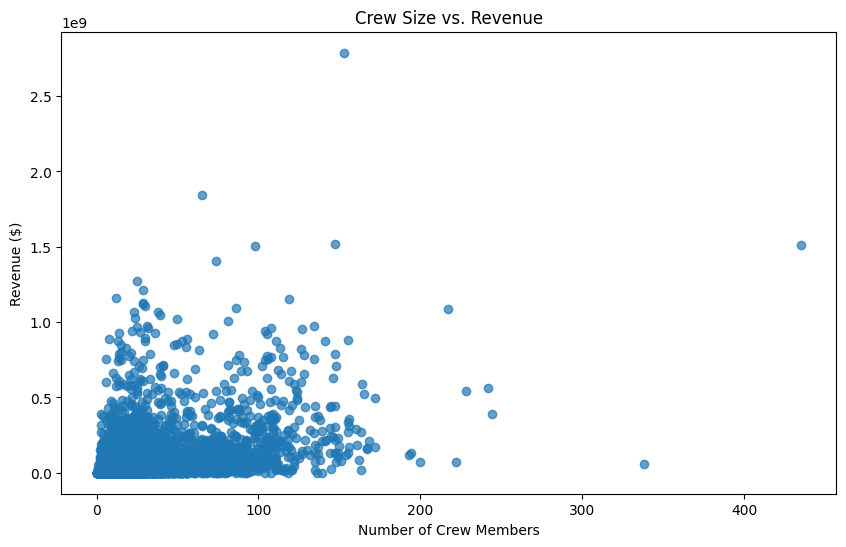

In [7]:
def analise_equipe_orcamento(df):
    print("Análise de equipe e orçamento em desenvolvimento...")
    # Implementação futura
    # Calculate crew size
    df['crew_size'] = df['crew'].apply(lambda x: len(eval(x)))

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['crew_size'], df['revenue'], alpha=0.7)
    plt.title('Crew Size vs. Revenue')
    plt.xlabel('Number of Crew Members')
    plt.ylabel('Revenue ($)')

    # Calculate correlation
    crew_revenue_corr = df['crew_size'].corr(df['revenue'])
    print(f"Correlation between crew size and revenue: {crew_revenue_corr:.2f}")
analise_equipe_orcamento(df)

## 8. Análise de Distribuição Geográfica

Vamos analisar a distribuição geográfica das produções e sua relação com orçamento e receita.

In [ ]:
def analise_distribuicao_geografica(df):
    print("Análise de distribuição geográfica em desenvolvimento...")
    # Implementação futura

analise_distribuicao_geografica(df)

Análise de distribuição geográfica em desenvolvimento...


## 9. Análise de Data de Lançamento

Vamos investigar se existe correlação entre a data de lançamento e o desempenho de bilheteria.

Análise de data de lançamento em desenvolvimento...


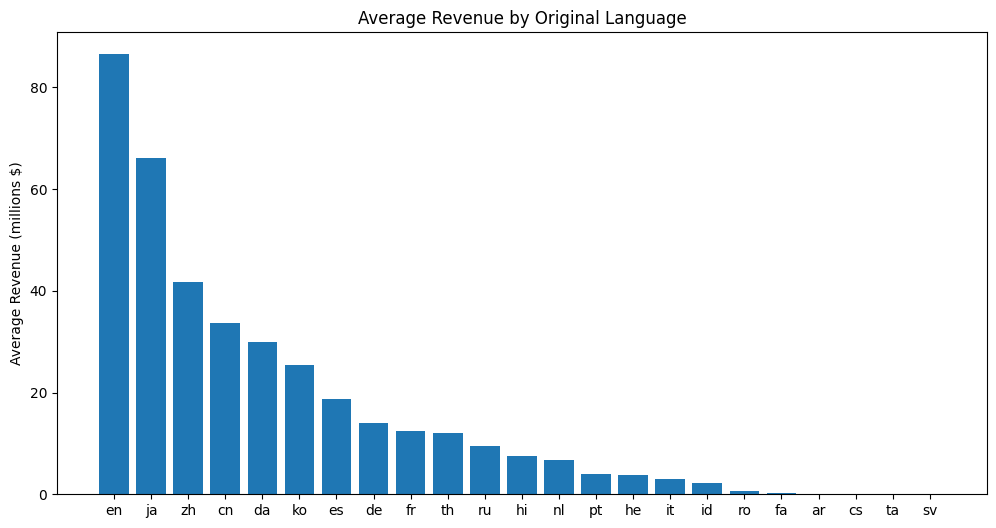

In [9]:
def analise_data_bilheteria(df):
    print("Análise de data de lançamento em desenvolvimento...")
    # Implementação futura
    # Group by original language
    language_analysis = df.groupby('original_language').agg({
        'index': 'count',
        'budget': 'mean',
        'revenue': 'mean',
        'vote_average': 'mean'
    }).rename(columns={'index': 'movie_count'}).reset_index()

    # Filter languages with at least 2 movies
    language_analysis = language_analysis[language_analysis['movie_count'] >= 2]

    # Sort by average revenue
    language_analysis = language_analysis.sort_values('revenue', ascending=False)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(language_analysis['original_language'], language_analysis['revenue'] / 1000000)
    plt.ylabel('Average Revenue (millions $)')
    plt.title('Average Revenue by Original Language')
analise_data_bilheteria(df)

## 10. Análise Temporal de Orçamento e Receita

Vamos analisar como o orçamento e a receita dos filmes mudaram ao longo do tempo.

Análise temporal de orçamento e receita em desenvolvimento...


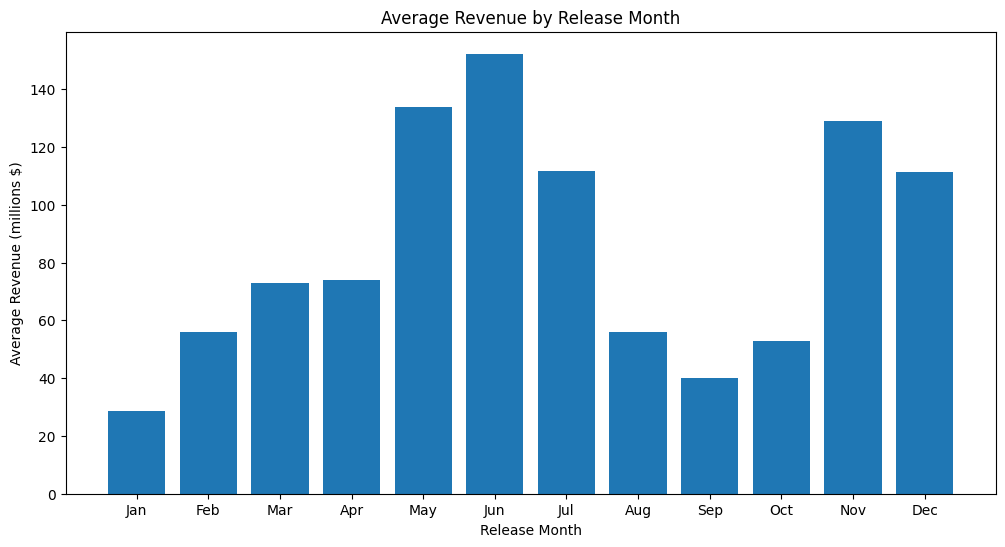

In [10]:
def analise_orcamento_tempo(df):
    print("Análise temporal de orçamento e receita em desenvolvimento...")
    # Implementação futura
    # This is a more complex analysis that would require salary data
    # Since we don't have direct salary info, let's create a new question:

    # How does the release month affect box office performance?
    df['release_month'] = pd.to_datetime(df['release_date']).dt.month

    monthly_performance = df.groupby('release_month').agg({
        'revenue': 'mean',
        'index': 'count'
    }).rename(columns={'index': 'movie_count'}).reset_index()

    plt.figure(figsize=(12, 6))
    plt.bar(monthly_performance['release_month'], monthly_performance['revenue'] / 1000000)
    plt.xlabel('Release Month')
    plt.ylabel('Average Revenue (millions $)')
    plt.title('Average Revenue by Release Month')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
analise_orcamento_tempo(df)